# LC3 DATA ANALYSIS

### Load libraries and data

In [2]:
# Libraries for general data management
import pandas as pd
import numpy  as np

In [3]:
# Libraries for creating and validating models
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_squared_error
from sklearn.model_selection import LeaveOneOut, cross_val_predict, cross_val_score

In [4]:
# Libraries for data visualization
import matplotlib.pyplot  as plt
import matplotlib.patches as mpatches

In [5]:
# Input file path (can be also an excel)

DATA_MERGED_PATH = './data/data_merged.ods'
DATA_FULL_PATH   = './data/data_full.ods'

In [6]:
# Read full data and remove empty lines
data_full = pd.read_excel(DATA_FULL_PATH,sheet_name='All_data_in_rows')
data_full.dropna(how="all", inplace=True)

In [7]:
data_full

,Clay,day_1,day_3,day_7,day_28,day_90
1,B45 Quartz B250,7.69375,18.33125,26.13125,29.118750,29.381250
2,B45 Quartz B250,8.16875,19.20000,25.57500,28.456250,31.218750
3,B45 Quartz B250,7.95000,18.70625,27.03750,29.350000,30.256250
4,B45 Quartz B250,7.52500,18.70000,25.55000,29.750000,29.393750
5,B45 Quartz B250,7.70625,18.48125,NaN,NaN,NaN
...,...,...,...,...,...,...
245,Guinea 2,10.00000,23.73750,40.21250,49.993764,NaN
246,Guinea 2,9.96250,23.55000,39.75625,49.862183,NaN
248,Guinea 3,9.82500,20.15000,29.80000,39.903597,42.787325
249,Guinea 3,9.05000,21.40625,32.18750,41.524118,NaN


In [8]:
data_clay   = pd.read_excel(DATA_FULL_PATH,sheet_name='Clays_properties')
data_clay.head(3)

,Clay,Calcined clay,Origin of clay,Calcination,Calcined kaolinite content (%),"Dv,50 (µm)",D10,D90,Span (-),BET Specific surface (m2/g),...,CaO,MgO,SO3,Na2O,K2O,TiO2,P2O5,MnO,Others,LOI
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Imerys 2%,2.0,South America,Flash,91,5.9,0.198,21.0,3.52576,15.9,...,-,-,-,-,0.06,2.278,-,-,-,2.02


In [9]:
data_full_clay = pd.merge(data_full, data_clay, left_on='Clay', right_on='Clay', how='left')

In [10]:
data_full_clay.head(10)

,Clay,day_1,day_3,day_7,day_28,day_90,Calcined clay,Origin of clay,Calcination,Calcined kaolinite content (%),...,CaO,MgO,SO3,Na2O,K2O,TiO2,P2O5,MnO,Others,LOI
0,B45 Quartz B250,7.69375,18.33125,26.13125,29.11875,29.38125,NaN,-,-,0,...,-,-,-,-,0.1,NaN,-,-,-,0.1
1,B45 Quartz B250,8.16875,19.20000,25.57500,28.45625,31.21875,NaN,-,-,0,...,-,-,-,-,0.1,NaN,-,-,-,0.1
2,B45 Quartz B250,7.95000,18.70625,27.03750,29.35000,30.25625,NaN,-,-,0,...,-,-,-,-,0.1,NaN,-,-,-,0.1
3,B45 Quartz B250,7.52500,18.70000,25.55000,29.75000,29.39375,NaN,-,-,0,...,-,-,-,-,0.1,NaN,-,-,-,0.1
4,B45 Quartz B250,7.70625,18.48125,NaN,NaN,NaN,NaN,-,-,0,...,-,-,-,-,0.1,NaN,-,-,-,0.1
5,B45 Brazil2,9.86250,23.58125,38.96250,46.95625,45.68125,36.0,South America,Furnace,35,...,0.5,-,-,-,0.3,1.5,-,-,-,1.4
6,B45 Brazil2,10.17500,25.35000,39.21875,46.78750,46.59375,36.0,South America,Furnace,35,...,0.5,-,-,-,0.3,1.5,-,-,-,1.4
7,B45 Brazil2,9.97500,25.45625,38.97500,46.48750,49.85625,36.0,South America,Furnace,35,...,0.5,-,-,-,0.3,1.5,-,-,-,1.4
8,B45 Brazil2,9.35000,23.96250,39.98125,47.66875,48.50000,36.0,South America,Furnace,35,...,0.5,-,-,-,0.3,1.5,-,-,-,1.4
9,B45 Brazil2,9.91875,24.44375,41.05625,NaN,NaN,36.0,South America,Furnace,35,...,0.5,-,-,-,0.3,1.5,-,-,-,1.4


In [11]:
# We rename some columns for having an easier reference
data_full_clay.rename(columns = {'Calcined kaolinite content (%)':'Kaolinite_content'}, inplace = True)
data_full_clay.rename(columns = {'Dv,50 (µm)':'Dv50'                                 }, inplace = True)
data_full_clay.rename(columns = {'BET Specific surface (m2/g)':'BET_specific_surface'}, inplace = True)

data_full_clay.rename(columns = {'STD'  : 'STD_1D'}, inplace = True)
data_full_clay.rename(columns = {'STD.1': 'STD_3D'}, inplace = True)
data_full_clay.rename(columns = {'STD.2': 'STD_7D'}, inplace = True)
data_full_clay.rename(columns = {'STD.3':'STD_28D'}, inplace = True)
data_full_clay.rename(columns = {'STD.4':'STD_90D'}, inplace = True)

# Sorting allows us to plot functions more easily
data_full_clay = data_full_clay.sort_values('Kaolinite_content')

# Get useful dataframe information
#data               # Get data
#data.describe()    # Get data general information
#data.columns       # Get data features names
#data.corr()        # Get correlation matrix

### Visualize data

In [12]:
# Take kaolinite content
x = data_full_clay['Kaolinite_content'].values # (Pandas dataframe).values = numpy array

# Take compression strengths
y1  = data_full_clay[ "day_1"].values
y3  = data_full_clay[ "day_3"].values
y7  = data_full_clay[ "day_7"].values
y28 = data_full_clay["day_28"].values
y90 = data_full_clay["day_90"].values

# Measures at 90 days have missing values (4 in total)
x1 =   x[np.logical_not(np.isnan(y1))]
y1 = y1[np.logical_not(np.isnan(y1))]
x3 =   x[np.logical_not(np.isnan(y3))]
y3 = y3[np.logical_not(np.isnan(y3))]
x7 =   x[np.logical_not(np.isnan(y7))]
y7 = y7[np.logical_not(np.isnan(y7))]
x28 =   x[np.logical_not(np.isnan(y28))]
y28 = y28[np.logical_not(np.isnan(y28))]
x90 =   x[np.logical_not(np.isnan(y90))]
y90 = y90[np.logical_not(np.isnan(y90))]

# Take standard deviations
#z1  = data[ "STD_1D"].values
#z3  = data[ "STD_3D"].values
#z7  = data[ "STD_7D"].values
#z28 = data["STD_28D"].values
#z90 = data["STD_90D"].values


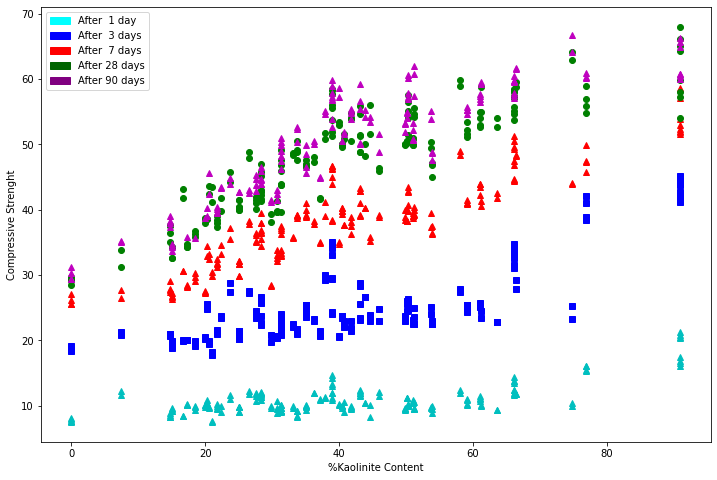

In [13]:
# Show points using matplotlib.pyplot library
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(x1,y1,'c^',x3,y3,'bs',x7,y7,'r^',x28,y28,'go', x90,y90,'m^' )
plt.xlabel('%Kaolinite Content')
plt.ylabel('Compressive Strenght')

d1_patch  = mpatches.Patch(color='cyan',      label='After  1 day')
d3_patch  = mpatches.Patch(color='blue',      label='After  3 days')
d7_patch  = mpatches.Patch(color='red',       label='After  7 days')
d28_patch = mpatches.Patch(color='darkgreen', label='After 28 days')
d90_patch = mpatches.Patch(color='purple',    label='After 90 days')
plt.legend(handles=[d1_patch,d3_patch,d7_patch,d28_patch,d90_patch])

plt.show()

# COMPRESSION STRENGTH (CS)

### Feature selection

In [14]:
# Which features are realiable? Those with more than RELIABLE_THRESHOLD measurements
RELIABLE_THRESHOLD = 45

features = data_full_clay.columns[14:]
reliable_features = [f for f in features if data_full_clay[f].describe()[0] >= RELIABLE_THRESHOLD]


In [15]:
# Show the reliable features, with enough points to rely
reliable_features

['BET_specific_surface',
 'Calcined clay.1',
 'SiO2',
 'Al2O3',
 'Fe2O3',
 'CaO',
 'MgO',
 'SO3',
 'Na2O',
 'K2O',
 'TiO2',
 'P2O5',
 'MnO',
 'Others',
 'LOI']

In [16]:
# Function to return the R2 and validation score for a model (linear regression by default)
def model_validation(X, y, model=LinearRegression()):
    # Train the model
    model.fit(X, y) 
    # Get the list of predictions obtained while validating
    predicted = cross_val_predict(model, X, y, cv=LeaveOneOut())
    
    # Return the metrics
    return model.score(X,y), mean_squared_error(y, predicted)

In [17]:
# TODO: We are computing metrics for every feature, why not building a matrix with all te information?

# Function to perform feature selection from those given as parameter. It choses those
# features that better complements kaolinite content for achieving the best R2 and MSE.
def feature_selection(features, days=[1,3,7,28,90]):
    # For every day we want to do feature selection
    for i in days:    
        day = 'day_'+str(i)
        bestR2  = -1 
        bestMse = float('inf')
        
        # Go for every feature given and check wich results we get with it
        for feature in features:
            # IMPORTANT! Metrics can cheat us if we drop NaNs!!
            # IMPORTANT! That's what we have to rely the features we are testing!!
            df = data_full_clay[['Kaolinite_content', feature, day]].dropna()
            df['Kaolinite_content_square'] = (df['Kaolinite_content'].values)**2
            
            # Kaolinite content is always in our features in degree one and two
            X = df[['Kaolinite_content', 'Kaolinite_content_square', feature]].values
            y = df[day].values
        
            # Get the metrics
            r2, mse = model_validation(X,y)
            
            # Keep the bests
            if r2 > bestR2:
                bestR2         = r2
                bestR2_mse     = mse
                bestR2_feature = feature
            
            if mse < bestMse:
                bestMse        = mse
                bestMse_r2     = r2
                bestMse_feature= feature
        
            #print('Kaolinite content +  Kaolinite content square + '+feature)
            #print('R2:  '+str(r2))
            #print('MSE: '+str(mse))
        
        # Print report for this day 
        print('=============================================================================')
        print('Best features for compression strength at day '+str(i))
        print('=============================================================================')
        print()
        print('Best R2  achieved for degree two kaolinite content and '+bestR2_feature)
        print('R2:  '+str(bestR2))
        print('MSE: '+str(bestR2_mse))
        print()
        print('Best MSE achieved for degree two kaolinite content and '+bestMse_feature)
        print('R2:  '+str(bestMse_r2))
        print('MSE: '+str(bestMse))
        print()

In [18]:
feature_selection(reliable_features)

ValueError: could not convert string to float: 'Quartz'

In [19]:
feature_selection(features)

ValueError: could not convert string to float: 'Quartz'

### Linear regression models

We have seen that the kaolinite content is the most predictive feature that we have. We are going to start creating simple linear regression models and then, following the appreciations obtained by visualizing the data, we are going to create non-linear models based on the kaolinite content for better fitting the data distribution as well as models with more features for avoiding data sparsification.

Two metrics are going to be extremely important here:
* **R square:** Is giving us a measurement of how good is our model (the closer to 1.0 the better). 
* **Validation score:** Is going to let us control overfitting. Improving R² means nothing if validation is worse. We'll use mean squared error with Leave One Out cross validation to estimate it.

In [24]:
# TODO: Remove outlier in y1 data?
# TODO: Idea for the report, removing pesimist outliers is not a good idea in our project!
# TODO: Add OPC compression strength values for reference

#### Linear models based on the kaolinite content

In [13]:
# Create, estimate, validate and show the model
def leave_one_out_validation(X, y, model=LinearRegression()):
    # Train the model
    model.fit(X, y) 
    
    # Plot the results
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(X, np.dot(X,model.coef_) + model.intercept_,'r-')
    ax.scatter(X, y, edgecolors=(0, 0, 0))
    ax.set_xlabel('% Kaolinite content')
    ax.set_ylabel('Compressive strength')
    plt.show()
    
    # Get the list of predictions obtained while validating
    predicted = cross_val_predict(model, X, y, cv=LeaveOneOut())
    
    # Model and metrics
    print('f(x) = {0} + {1}*x'.format(model.intercept_, model.coef_[0]))
    print()
    print("MSE: {}".format(mean_squared_error(y, predicted)))
    print("R^2: {}".format(model.score(X,y)))

In [20]:
# ver donde estaban los NaN
# data_full_clay[['Clay','day_90','Kaolinite_content']].isnull().sum().sum()
pd.set_option('display.max_rows', None)
data_full_clay[['Clay','day_90','Kaolinite_content']]

,Clay,day_90,Kaolinite_content
0,B45 Quartz B250,29.381250,0
1,B45 Quartz B250,31.218750,0
2,B45 Quartz B250,30.256250,0
3,B45 Quartz B250,29.393750,0
4,B45 Quartz B250,NaN,0
157,Iran G2,35.025000,7.4
158,Iran G2,35.150000,7.4
60,Holcim 3 U.S.,39.043750,14.8
61,Holcim 3 U.S.,37.918750,14.8
62,Holcim 3 U.S.,37.300000,14.8


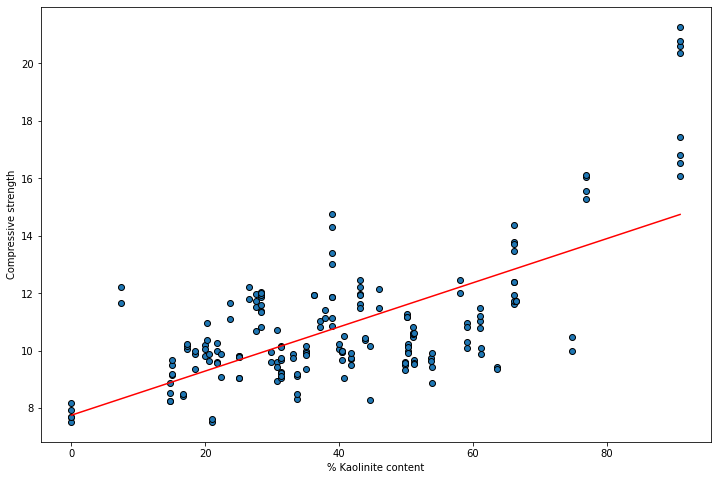

f(x) = 7.757071248182706 + 0.07675459691387533*x

MSE: 2.998686102097349
R^2: 0.45106283702868666


In [58]:
leave_one_out_validation(x1.reshape(-1,1), y1)

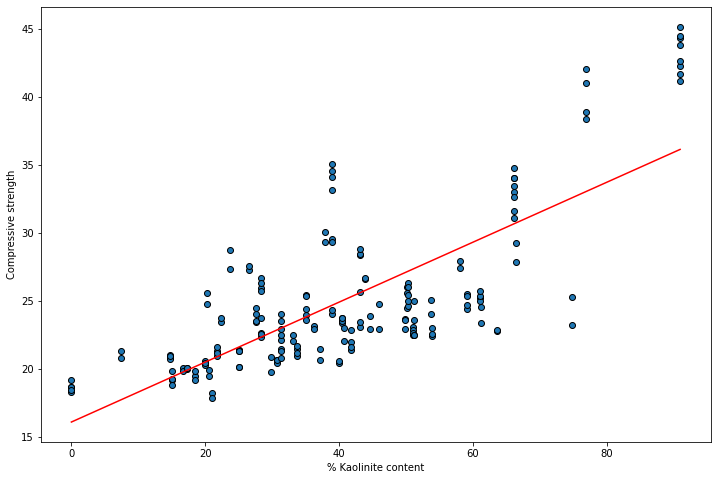

f(x) = 16.11138281681658 + 0.22028582288371565*x

MSE: 14.304219475415978
R^2: 0.5850161286666817


In [60]:
leave_one_out_validation(x3.reshape(-1,1), y3)

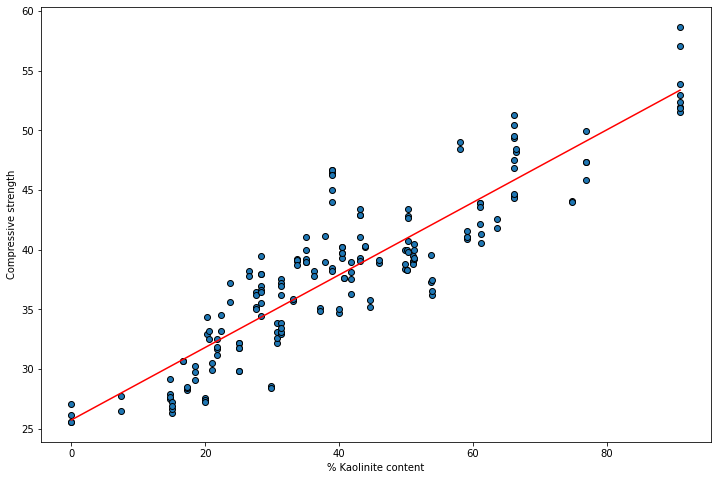

f(x) = 25.72491386854514 + 0.3039226286708796*x

MSE: 9.22695612206208
R^2: 0.8021815770299499


In [61]:
leave_one_out_validation(x7.reshape(-1,1), y7)

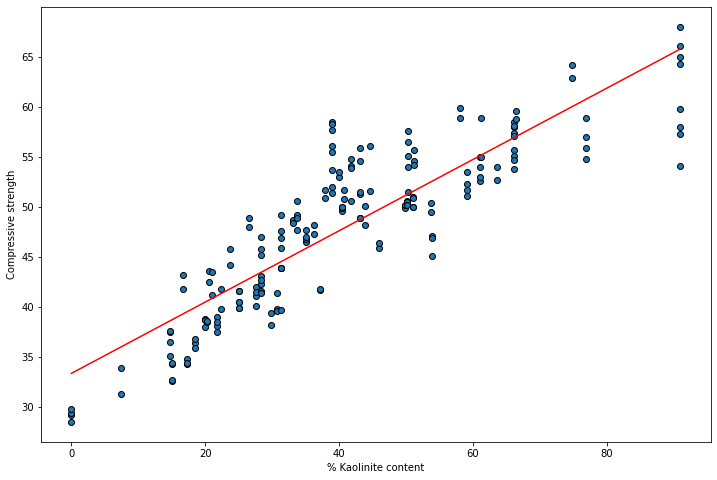

f(x) = 33.32503170252927 + 0.3564569705862277*x

MSE: 15.533889722852303
R^2: 0.7708551476800288


In [62]:
leave_one_out_validation(x28.reshape(-1,1), y28)

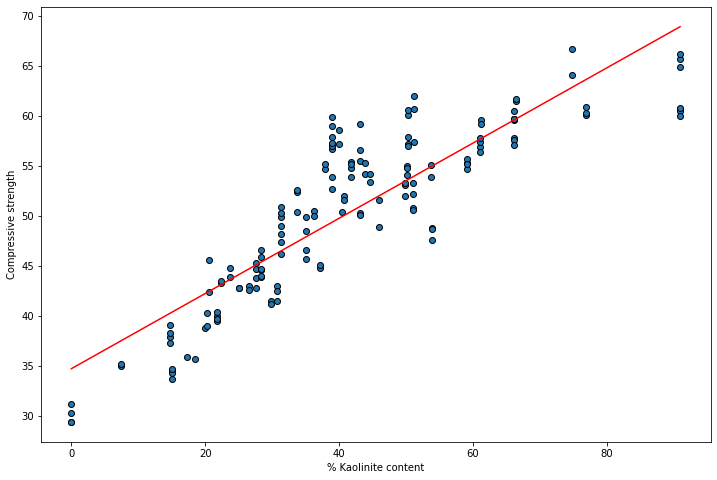

f(x) = 34.719443739777574 + 0.37600791701330843*x

MSE: 16.718293276195176
R^2: 0.7789095764964387


In [63]:
leave_one_out_validation(x90.reshape(-1,1), y90)

**First sight analysis:**

* There is few more we can improve at the 7th day using only the kaolinite content, data distribution is quite a straight line.
* For 1st and 3rd day the problem is more the sparsification of the points than the lack of expresivity of the model.
* For 28th and 90th day until 40% of kaolinite content the compression strength increases linearly and then estabilizes. Makes sense a non-linear model.
* It doesn't make sense in any model a degree 3 regression model, compression strength increases with kaolinite content.

#### Non-linear models based on the kaolinite content

In [71]:
# x_2 = Kaolinite content, (Kaolinite content)^2
x1_2   = np.array([x1, x1**2]).T
x3_2   = np.array([x3, x3**2]).T
x7_2   = np.array([x7, x7**2]).T
x28_2   = np.array([x28, x28**2]).T
x90_2 = np.array([x90,x90*x90]).T 

In [66]:
# Same function than before but adapted for degree two case
def leave_one_out_validation(X, y, model=LinearRegression()):
    # Train and show the model
    model.fit(X, y) 
    
    # This could be generalized but degree n >= 3 leads to overfitting!
    print('f(x) = {0} + {1}*x + {2}*x^2'.format(model.intercept_, model.coef_[0], model.coef_[1]))
        
    # Get the list of predictions obtained while validating
    predicted = cross_val_predict(model, X, y, cv=LeaveOneOut())
    
    # Plot the results
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(X[:,0], np.dot(X,model.coef_) + model.intercept_,'r-')
    ax.scatter(X[:,0], y, edgecolors=(0, 0, 0))
    ax.set_xlabel('% Kaolinite content')
    ax.set_ylabel('Compressive strength')
    plt.show()
    
    # Metrics for the model
    print("MSE: {}".format(mean_squared_error(y, predicted)))
    print("R^2: {}".format(model.score(X,y)))

f(x) = 10.310550266313655 + -0.06317775324896209*x + 0.0015247208198673212*x^2


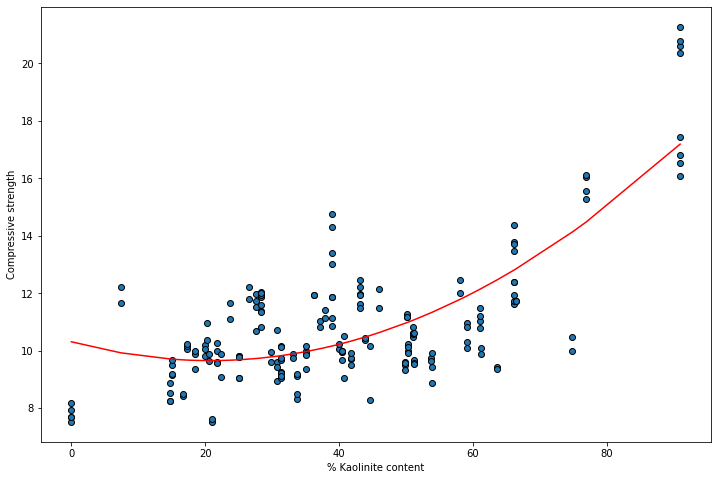

MSE: 2.335067644384823
R^2: 0.5802361848393611


In [67]:
leave_one_out_validation(x1_2, y1)

f(x) = 21.499593836099045 + -0.07517428017416158*x + 0.003217313075448703*x^2


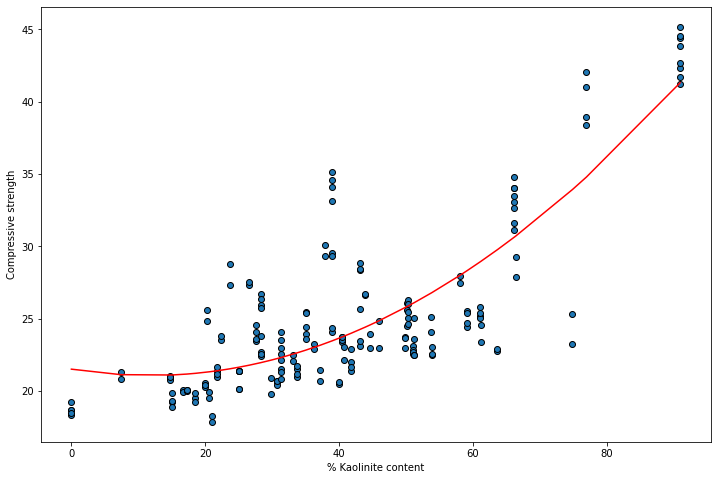

MSE: 11.161599829779187
R^2: 0.6761941738185395


In [68]:
leave_one_out_validation(x3_2, y3)

f(x) = 24.622228848517516 + 0.3633448897361721*x + -0.0006406772264533244*x^2


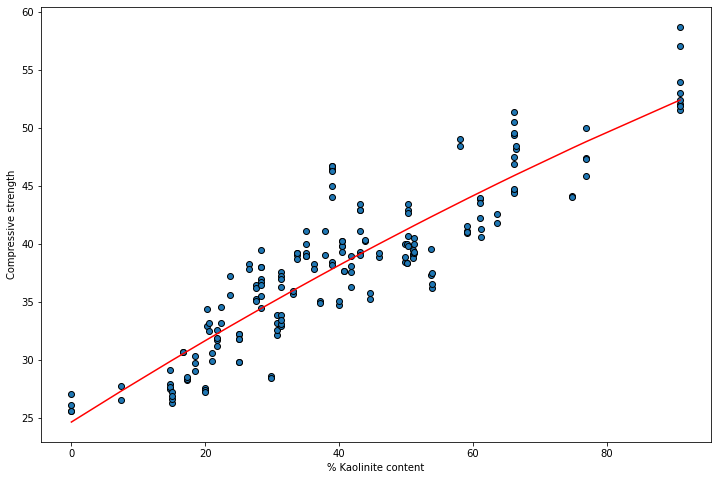

MSE: 9.199436032207917
R^2: 0.8046818970628405


In [69]:
leave_one_out_validation(x7_2, y7)

f(x) = 27.502120699429362 + 0.6708050880810226*x + -0.003387953141111517*x^2


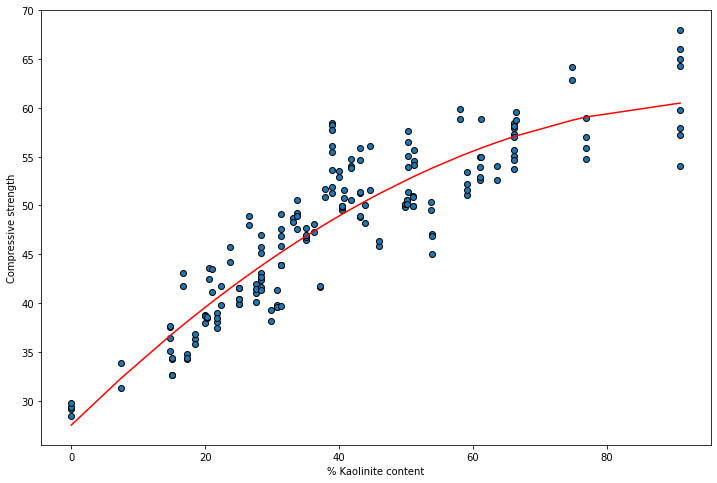

MSE: 12.368760880897872
R^2: 0.8195507057666824


In [72]:
leave_one_out_validation(x28_2, y28)

f(x) = 27.579245899063146 + 0.7607794319834155*x + -0.004156145005989403*x^2


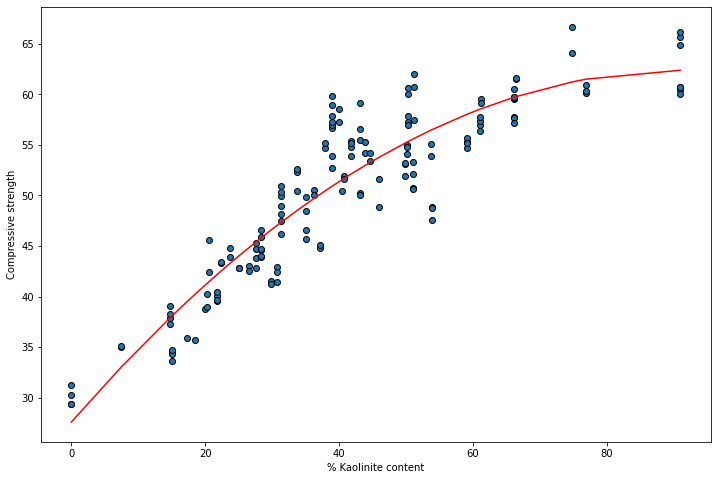

MSE: 11.27198266178944
R^2: 0.851266734197279


In [73]:
leave_one_out_validation(x90_2, y90)

**First sight analysis:**

* Expected results, better models obtained for 28th and 90th day compression strength obtained.
* We might be experiencing overfitting with this model for 1st and 3rd day measurements because we're not increasing the compressive strength with the increase of calonita for small contents.

#### Linear regression models based on the kaolinite content and other features

Following the results obtained in the feature selection part, here we are creating and analyzing the models done with the kaolinite conent (in degree one and two) as well as other feature.

In [38]:
# TODO: The most important question here is to be (dropped the NaN) or not to be (and then replace them)

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [40]:
# Funcion for returning the data ready for creating models with kaolinite and a given feature
def get_model_data(feature, day, drop_nan=True, replace_nan=False):
    # Get kaolinite content in degree one and two and the parameter feature
    df_aux = data[['Kaolinite_content', feature, day]]
    df_aux.insert(1, 'Kaolinite_content_square', data['Kaolinite_content']**2, True)
    # Copy for data integrity if we replace NaN
    df_aux = df_aux.copy()
    
    if drop_nan:
        df_aux = df_aux.dropna()
    elif replace_nan:
        df_aux.fillna(value=df_aux[feature].mean(), inplace=True)
    
    df_aux.rename(columns = {day : 'day_'+day[0]}, inplace = True)
    
    return df_aux

In [41]:
# Day 1 
mod = smf.ols(formula='day_1 ~ Kaolinite_content + Kaolinite_content_square + Dv50', data=get_model_data('Dv50','1D'))
np.random.seed(2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  day_1   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     25.71
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           7.68e-10
Time:                        12:49:41   Log-Likelihood:                -86.899
No. Observations:                  49   AIC:                             181.8
Df Residuals:                      45   BIC:                             189.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    9.7052      0.960     10.105      0.000       7.771      11.640
Kaolinite_content           -0.0310      0.038     -0.806      0.425      -0.109       0.047
Kaolinite_content_square     0.0011      0.000      2.971      0.005       0.000       0.002
Dv50                         0.0086      0.030      0.285      0.777      -0.052       0.069
==============================================================================
Omnibus:                        3.012   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                2.083
Skew:                           0.472   Prob(JB):                        0.353
Kurtosis:                       3.357   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# Day 1 
mod = smf.ols(formula='day_1 ~ Kaolinite_content + Kaolinite_content_square + CaO', data=get_model_data('CaO','1D'))
np.random.seed(2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  day_1   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     4.297
Date:                Fri, 27 Nov 2020   Prob (F-statistic):            0.00961
Time:                        12:49:48   Log-Likelihood:                -75.651
No. Observations:                  48   AIC:                             159.3
Df Residuals:                      44   BIC:                             166.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.3191      0.931     11.082      0.000       8.442      12.196
Kaolinite_content           -0.0208      0.046     -0.453      0.653      -0.113       0.072
Kaolinite_content_square     0.0006      0.001      1.176      0.246      -0.000       0.002
CaO                         -0.0601      0.102     -0.589      0.559      -0.266       0.146
==============================================================================
Omnibus:                        1.110   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.574   Jarque-Bera (JB):                0.966
Skew:                           0.112   Prob(JB):                        0.617
Kurtosis:                       2.342   Cond. No.                     1.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# Day 3
mod = smf.ols(formula='day_3 ~ Kaolinite_content + Kaolinite_content_square + Dv50', data=get_model_data('Dv50','3D'))
np.random.seed(2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  day_3   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     50.61
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           1.83e-14
Time:                        12:49:48   Log-Likelihood:                -121.25
No. Observations:                  49   AIC:                             250.5
Df Residuals:                      45   BIC:                             258.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   20.6470      1.936     10.664      0.000      16.747      24.547
Kaolinite_content           -0.0943      0.078     -1.216      0.230      -0.251       0.062
Kaolinite_content_square     0.0033      0.001      4.280      0.000       0.002       0.005
Dv50                         0.1179      0.060      1.950      0.057      -0.004       0.240
==============================================================================
Omnibus:                        2.096   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.351   Jarque-Bera (JB):                1.859
Skew:                           0.363   Prob(JB):                        0.395
Kurtosis:                       2.380   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# Day 3
mod = smf.ols(formula='day_3 ~ Kaolinite_content + Kaolinite_content_square + CaO', data=get_model_data('CaO','3D'))
np.random.seed(2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  day_3   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     9.603
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           5.38e-05
Time:                        12:49:48   Log-Likelihood:                -116.04
No. Observations:                  48   AIC:                             240.1
Df Residuals:                      44   BIC:                             247.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   21.0784      2.160      9.759      0.000      16.725      25.431
Kaolinite_content            0.0193      0.106      0.182      0.857      -0.195       0.233
Kaolinite_content_square     0.0012      0.001      0.978      0.333      -0.001       0.004
CaO                         -0.0299      0.237     -0.126      0.900      -0.507       0.447
==============================================================================
Omnibus:                        7.797   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.035
Skew:                           0.912   Prob(JB):                       0.0297
Kurtosis:                       3.441   Cond. No.                     1.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# Day 7
mod = smf.ols(formula='day_7 ~ Kaolinite_content + Kaolinite_content_square + BET_specific_surface', data=get_model_data('BET_specific_surface','7D'))
np.random.seed(2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  day_7   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     135.0
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           3.26e-22
Time:                        12:49:48   Log-Likelihood:                -108.79
No. Observations:                  48   AIC:                             225.6
Df Residuals:                      44   BIC:                             233.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   26.1036      1.330     19.625      0.000      23.423      28.784
Kaolinite_content            0.2860      0.063      4.504      0.000       0.158       0.414
Kaolinite_content_square     0.0003      0.001      0.424      0.674      -0.001       0.002
BET_specific_surface         0.0019      0.026      0.073      0.942      -0.051       0.054
==============================================================================
Omnibus:                        6.253   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.697
Skew:                           0.273   Prob(JB):                        0.260
Kurtosis:                       1.975   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# Day 28
mod = smf.ols(formula='day_2 ~ Kaolinite_content + Kaolinite_content_square + BET_specific_surface', data=get_model_data('BET_specific_surface','28D'))
np.random.seed(2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  day_2   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     81.75
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           5.06e-18
Time:                        12:49:48   Log-Likelihood:                -126.80
No. Observations:                  48   AIC:                             261.6
Df Residuals:                      44   BIC:                             269.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   29.5305      1.936     15.256      0.000      25.629      33.432
Kaolinite_content            0.6248      0.092      6.761      0.000       0.439       0.811
Kaolinite_content_square    -0.0029      0.001     -3.121      0.003      -0.005      -0.001
BET_specific_surface        -0.0219      0.038     -0.576      0.568      -0.098       0.055
==============================================================================
Omnibus:                        4.370   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                1.885
Skew:                          -0.048   Prob(JB):                        0.390
Kurtosis:                       2.034   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# Day 28
mod = smf.ols(formula='day_2 ~ Kaolinite_content + Kaolinite_content_square + TiO2', data=get_model_data('TiO2','28D'))
np.random.seed(2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  day_2   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     89.38
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           2.62e-20
Time:                        12:49:49   Log-Likelihood:                -142.02
No. Observations:                  55   AIC:                             292.0
Df Residuals:                      51   BIC:                             300.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   29.1441      2.169     13.435      0.000      24.789      33.499
Kaolinite_content            0.5343      0.091      5.874      0.000       0.352       0.717
Kaolinite_content_square    -0.0021      0.001     -2.340      0.023      -0.004      -0.000
TiO2                         1.1688      0.651      1.796      0.078      -0.138       2.476
==============================================================================
Omnibus:                        4.739   Durbin-Watson:                   2.427
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                2.042
Skew:                          -0.052   Prob(JB):                        0.360
Kurtosis:                       2.062   Cond. No.                     1.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# Day 90
mod = smf.ols(formula='day_9 ~ Kaolinite_content + Kaolinite_content_square + BET_specific_surface', data=get_model_data('BET_specific_surface','90D'))
np.random.seed(2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  day_9   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     112.5
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           1.55e-19
Time:                        12:49:49   Log-Likelihood:                -109.43
No. Observations:                  44   AIC:                             226.9
Df Residuals:                      40   BIC:                             234.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   28.9502      1.746     16.585      0.000      25.422      32.478
Kaolinite_content            0.7102      0.085      8.392      0.000       0.539       0.881
Kaolinite_content_square    -0.0035      0.001     -4.311      0.000      -0.005      -0.002
BET_specific_surface        -0.0191      0.035     -0.552      0.584      -0.089       0.051
==============================================================================
Omnibus:                        0.608   Durbin-Watson:                   2.314
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.720
Skew:                           0.162   Prob(JB):                        0.698
Kurtosis:                       2.463   Cond. No.                     1.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# Day 90
mod = smf.ols(formula='day_9 ~ Kaolinite_content + Kaolinite_content_square + TiO2', data=get_model_data('TiO2','90D'))
np.random.seed(2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  day_9   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     113.2
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           1.63e-21
Time:                        12:49:49   Log-Likelihood:                -125.59
No. Observations:                  51   AIC:                             259.2
Df Residuals:                      47   BIC:                             266.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   28.0111      2.079     13.473      0.000      23.829      32.194
Kaolinite_content            0.6718      0.085      7.906      0.000       0.501       0.843
Kaolinite_content_square    -0.0032      0.001     -3.945      0.000      -0.005      -0.002
TiO2                         0.8563      0.590      1.452      0.153      -0.330       2.043
==============================================================================
Omnibus:                        0.114   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.945   Jarque-Bera (JB):                0.305
Skew:                          -0.064   Prob(JB):                        0.858
Kurtosis:                       2.643   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Confidence analysis for the models

We know our model (function depending on the features provided) as well as some metrics to have an idea of how well our model fits our data (R2) and how is it behaving in practice with new data (MSE). The objetive of this section is to provide a more mathematical analysis of the confidence we can expect from our models.

#### Toy example for putting things into practice

We are going to start with the Kaolinite content based model for compression strength at day 90 to exemplify the tools and techniques we can use to estimate confidence intervals in our model.

In [101]:
data_90=data_full_clay[['day_90','Kaolinite_content']]
data_90=data90.dropna()
data90square= data_90.copy()
data90square['Kaolinite_content_square']=data90square['Kaolinite_content'].apply(lambda x: x**2)
data90square.Kaolinite_content=data90square.Kaolinite_content.astype(float)
data90square

,day_90,Kaolinite_content,Kaolinite_content_square
0,29.381250,0.00,0.0000
1,31.218750,0.00,0.0000
2,30.256250,0.00,0.0000
3,29.393750,0.00,0.0000
157,35.025000,7.40,54.7600
158,35.150000,7.40,54.7600
60,39.043750,14.80,219.0400
61,37.918750,14.80,219.0400
62,37.300000,14.80,219.0400
63,38.318750,14.80,219.0400


In [95]:
# Day 90
mod = smf.ols(formula='day_90 ~ Kaolinite_content_square + Kaolinite_content', data=data90square)
np.random.seed(2)
res = mod.fit()
res.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 day_90   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     423.5
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           5.73e-62
Time:                        00:26:22   Log-Likelihood:                -394.61
No. Observations:                 151   AIC:                             795.2
Df Residuals:                     148   BIC:                             804.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   27.5792      1.048     26.307      0.000      25.508      29.651
Kaolinite_content_square    -0.0042      0.000     -8.485      0.000      -0.005      -0.003
Kaolinite_content            0.7608      0.047     16.079      0.000       0.667       0.854
==============================================================================
Omnibus:                        1.087   Durbin-Watson:                   0.617
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                0.983
Skew:                           0.197   Prob(JB):                        0.612
Kurtosis:                       2.972   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

f(x) = 27.579245899063146 + 0.7607794319834155*x + -0.004156145005989403*x^2


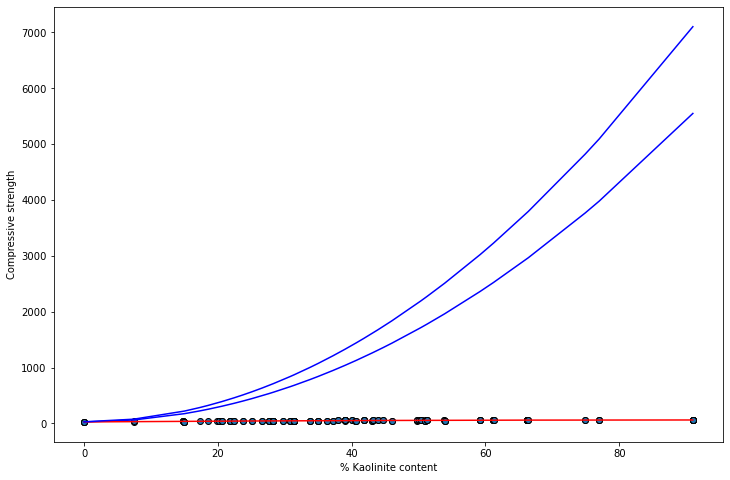

MSE: 11.27198266178944
R^2: 0.851266734197279


In [105]:
X = data90square[['Kaolinite_content','Kaolinite_content_square']].values
y = data90square['day_90']

# Train and show the model
model = LinearRegression()
model.fit(X, y) 

# This could be generalized but degree n >= 3 leads to overfitting!
print('f(x) = {0} + {1}*x + {2}*x^2'.format(model.intercept_, model.coef_[0], model.coef_[1]))
    
# Get the list of predictions obtained while validating
predicted = cross_val_predict(model, X, y, cv=LeaveOneOut())

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(X[:,0], y, edgecolors=(0, 0, 0))

ax.plot(X[:,0], np.dot(X,[-0.005,0.667]) + 25.508,'b-')
ax.plot(X[:,0], np.dot(X,model.coef_) + model.intercept_,'r-')
ax.plot(X[:,0], np.dot(X,[-0.003, 0.854]) + 29.651,'b-')

ax.set_xlabel('% Kaolinite content')
ax.set_ylabel('Compressive strength')
plt.show()

# Metrics for the model
print("MSE: {}".format(mean_squared_error(y, predicted)))
print("R^2: {}".format(model.score(X,y)))

In [ ]:
x = np.arange(data_quantiles.days.min(), data_quantiles.days.max(), 85)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(data_quantiles.days, data_quantiles.STD, alpha=.2)
ax.set_xlim((0, 100))
ax.set_ylim((0, 10))
legend = ax.legend()
ax.set_xlabel('Days', fontsize=16)
ax.set_ylabel('STD', fontsize=16);

**First sight analysis:**

* We can't afford confidence intervals of such a high precission with such a lack of points, specially for high kaolinite contents.
* However, this worths a try after adding all the points from the second excel!

### References:

* How to deal with small datasets:\
https://medium.com/rants-on-machine-learning/what-to-do-with-small-data-d253254d1a89

* Feature engineering: \
https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/

* Feature selection: \
https://en.wikipedia.org/wiki/Feature_selection \
https://machinelearningmastery.com/an-introduction-to-feature-selection/ \
https://machinelearningmastery.com/feature-selection-machine-learning-python/ \
https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/ \
https://machinelearningmastery.com/calculate-feature-importance-with-python/

* Linear regression with python: \
https://realpython.com/linear-regression-in-python/ 

* Confidence estimation: \
https://www.puneetarora2000.com/2020/01/data-interpretation-understanding-ols.html \
https://medium.com/@jyotiyadav99111/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01 \
https://www.statsmodels.org/stable/regression.html \

